In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import pandas as pd
import import_ipynb
import elementpath
from xml.etree import ElementTree as ET
from file_navigation import build_dataframe

games_df = build_dataframe()

In [2]:
games_df[games_df['title'] == 'Call of Duty Black Ops III']

,title,year,perspective,genre,developer,publisher,raw_images,labeled_images
10,Call of Duty Black Ops III,2015,first-person,first-person shooter,Treyarch,Activision,[images/raw_images/Call of Duty Black Ops III ...,[images/labeled_images/Call of Duty Black Ops ...


In [3]:
def filter_games(criteria):
    filtered_games = games_df[
        games_df['title'].isin(criteria) |
        games_df['year'].isin(criteria) |
        games_df['perspective'].isin(criteria) |
        games_df['genre'].isin(criteria) |
        games_df['developer'].isin(criteria) |
        games_df['publisher'].isin(criteria)
    ]
    return(filtered_games)

In [4]:
def parse_voc_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    annotations = []

    annotations.append(xml_path)
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        annotations.append({'label': label, 'bbox': (xmin, ymin, xmax, ymax)})
    
    return(annotations)

In [5]:
#annotations = parse_voc_xml(games_df[games_df['title'] == 'Alien Isolation']['labeled_images'][0][0])
#annotations

In [12]:
#criteria = ['Back 4 Blood', 'Alien Isolation', 'Battlefield 1']
#a_list = filter_games(criteria)

#criteria_list = []

#for list in a_list['labeled_images']:
#    for image in list:
#        criteria_list.append(parse_voc_xml(image))
    

#criteria_list

In [13]:
bbox_list = []
for list in games_df['labeled_images']:
    for image in list:
        bbox_list.append(parse_voc_xml(image))

In [8]:
for image_data in bbox_list:
    bboxes = image_data[1:]
    

In [21]:
import numpy as np
import matplotlib.pyplot as plt

bbox_data = bbox_list  # Replace this with your actual bounding box data

image_width, image_height = 1920, 1080
label_heatmaps = {}

# Process each bounding box
for image_data in bbox_data:
    bboxes = image_data[1:]  # Skip the title (first element)
    for bbox_data in bboxes:
        label = bbox_data['label']
        xmin, ymin, xmax, ymax = bbox_data['bbox']

        # Initialize a heatmap for the label if it doesn't exist
        if label not in label_heatmaps:
            label_heatmaps[label] = np.zeros((image_height, image_width), dtype=np.float32)

        # Increment heatmap values for the bounding box area
        label_heatmaps[label][ymin:ymax, xmin:xmax] += 1

# Normalize heatmaps for better visualization
for label, heatmap in label_heatmaps.items():
    if np.max(heatmap) > 0:  # Avoid division by zero
        label_heatmaps[label] = heatmap / np.max(heatmap)

# Function to plot the heatmap for a specific label
def plot_heatmap_for_label(label):
    if label in label_heatmaps:
        heatmap = label_heatmaps[label]
        plt.figure(figsize=(10, 6))
        plt.imshow(heatmap, cmap='hot', extent=[0, image_width, image_height, 0])
        plt.colorbar(label=f'Intensity for {label}')
        plt.title(f'Heatmap for {label}')
        plt.xlabel('Pixels (1920)')
        plt.ylabel('Pixels (1080)')
        plt.show()
    else:
        print(f"Label '{label}' not found in the data.")

# Example usage: Plot the heatmap for a specific label


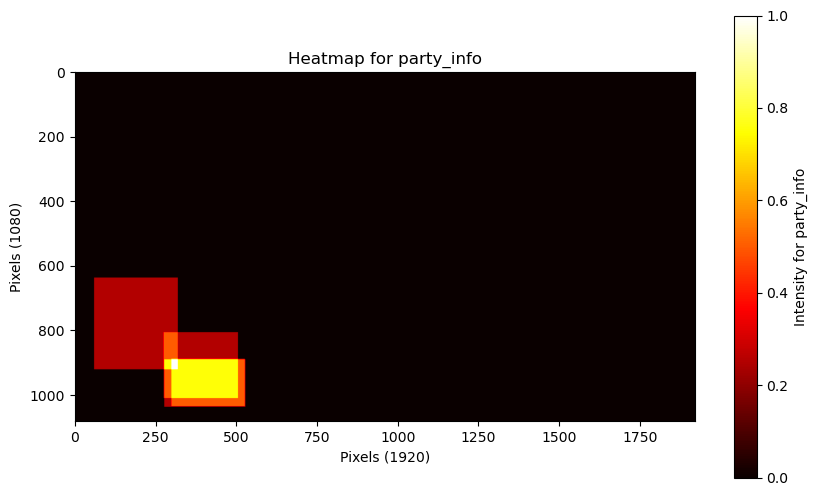

In [24]:
plot_heatmap_for_label('party_info')

In [12]:
games_df

,title,year,perspective,genre,developer,publisher,raw_images,annotated_images
0,Alien Isolation,2014,first-person,survival horror,Creative Assembly,Sega,[images/raw_images/Alien Isolation 01.jpg],[images/labeled_images/Alien Isolation 01.xml]
1,Back 4 Blood,2021,first-person,first-person shooter,Turtle Rock Studios,Warner Bros. Games,[images/raw_images/Back 4 Blood 01.jpg],[images/labeled_images/Back 4 Blood 01.xml]
2,Battlefield 1,2016,first-person,first-person shooter,DICE,Electronic Arts,[images/raw_images/Battlefield 1 01.jpg],[images/labeled_images/Battlefield 1 01.xml]
3,Battlefield 2042,2021,first-person,first-person shooter,DICE,Electronic Arts,[images/raw_images/Battlefield 2042 01.jpg],[images/labeled_images/Battlefield 2042 01.xml]
4,Battlefield V,2018,first-person,first-person shooter,DICE,Electronic Arts,[images/raw_images/Battlefield V 01.jpg],[images/labeled_images/Battlefield V 01.xml]
...,...,...,...,...,...,...,...,...
59,The Outer Worlds,2019,first-person,first-person shooter,Obsidian Entertainment,Private Division,[images/raw_images/The Outer Worlds 01.jpg],[]
60,Tom Clancys Rainbow Six Siege,2015,first-person,tactical-shooter,Ubisoft Montreal,Ubisoft,[images/raw_images/Tom Clancys Rainbow Six Sie...,[]
61,Wolfenstein II The New Colossus,0,first-person shooter,MachineGames,Bethesda Softworks,,[images/raw_images/Wolfenstein II The New Colo...,[]
62,Wolfenstein The New Order,2014,first-person,first-person shooter,MachineGames,Bethesda Softworks,[images/raw_images/Wolfenstein The New Order 0...,[]
